In [1]:
import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [15]:
# txtファイルの読み込み
overhead_time_list = []
with open('data/range.txt') as f:
    for line in f:
        overhead_time_list.append(dt.strptime(line[:-8], '%Y-%m-%d %H:%M:%S'))

In [29]:
temp_df = pandas.DataFrame(overhead_time_list, columns=["overhead"])

# 利用する時刻の抽出
dt_list = pandas.date_range(start='2022-06-02', periods=24, freq='H')
dt_list = dt_list[1:len(temp_df)+1]


In [30]:
temp_df['scheduled_time'] = dt_list
temp_df['delay'] = temp_df['overhead'] - temp_df['scheduled_time']
temp_df['delay_time'] = temp_df['delay'].dt.total_seconds()/60

In [31]:
temp_df['delay'].dt

In [32]:
temp_df

,overhead,scheduled_time,delay,delay_time
0,2022-06-02 01:41:09,2022-06-02 01:00:00,0 days 00:41:09,41.150000
1,2022-06-02 03:46:28,2022-06-02 02:00:00,0 days 01:46:28,106.466667
2,2022-06-02 04:46:07,2022-06-02 03:00:00,0 days 01:46:07,106.116667
3,2022-06-02 06:23:07,2022-06-02 04:00:00,0 days 02:23:07,143.116667
4,2022-06-02 07:18:25,2022-06-02 05:00:00,0 days 02:18:25,138.416667
5,2022-06-02 08:23:09,2022-06-02 06:00:00,0 days 02:23:09,143.150000
6,2022-06-02 09:17:52,2022-06-02 07:00:00,0 days 02:17:52,137.866667
7,2022-06-02 10:20:36,2022-06-02 08:00:00,0 days 02:20:36,140.600000
8,2022-06-02 11:15:52,2022-06-02 09:00:00,0 days 02:15:52,135.866667
9,2022-06-02 12:38:01,2022-06-02 10:00:00,0 days 02:38:01,158.016667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


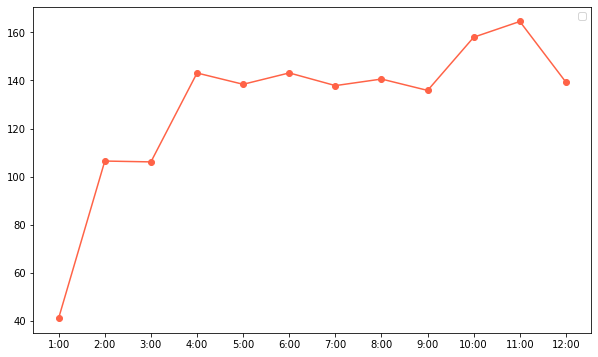

In [33]:
x1 = temp_df['scheduled_time'].dt.hour.astype(str) + ":00"
y1 = temp_df['delay_time']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, color='tomato',  linestyle='-', marker='o')
ax.set_xticks(temp_df['scheduled_time'].dt.hour.astype(str) + ":00")
plt.legend(bbox_to_anchor=(1, 1),loc='upper right')
plt.show()

